## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df.nunique()[0]

290584

d. The proportion of users converted.

In [11]:
converted = df.query('converted == 1')
print("{:.1f}%".format(converted.nunique()[0]/df.nunique()[0] * 100))

12.1%


e. The number of times the `new_page` and `treatment` don't line up.

In [12]:
number = df.query('landing_page == "new_page"')
control_fakes = number.query('group == "control"')
control_fakes.shape[0]

1928

In [13]:
number = df.query('landing_page == "old_page"')
treatment_fakes = number.query('group == "treatment"')
treatment_fakes.shape[0]

1965

In [8]:
1928 + 1965

3893

f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


It looks like there are no missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
indices = df[(df['group'] == "treatment") & (df['landing_page'] == "old_page")].index
more_indices = df[(df['group'] == "control") & (df['landing_page'] == "new_page")].index
total_indices = indices.append(more_indices)
df2 = df.drop(total_indices)
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [17]:
df2.user_id.nunique()
print("There are {0} unique user ids in df2".format(df2.user_id.nunique()))

There are 290584 unique user ids in df2


b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
df[df.duplicated(['user_id'], keep=False)].user_id

22        767017
192       656468
226       773693
240       733976
246       704650
           ...  
294308    905197
294309    787083
294328    641570
294331    689637
294355    744456
Name: user_id, Length: 7788, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [19]:
df[df.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
192,656468,2017-01-18 07:13:29.805052,treatment,new_page,1
226,773693,2017-01-23 18:05:45.167335,control,old_page,1
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
246,704650,2017-01-04 19:10:52.655062,treatment,new_page,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,treatment,new_page,0
294309,787083,2017-01-17 00:15:20.950723,control,old_page,0
294328,641570,2017-01-09 21:59:27.695711,control,old_page,0
294331,689637,2017-01-13 11:34:28.339532,control,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
df.drop_duplicates(subset='user_id')

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [31]:
prob = (df2.query('converted == 1').count() /df2.count())[0]
print("The probability of an individual converting regardless of page shown is {:.2f}%".format(prob*100))

The probability of an individual converting regardless of page shown is 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [32]:
control_group = df2.query('group == "control"')
control_prob = (control_group.query('converted == 1').count() / control_group.count())[0]
print("The probability of an individual converting from the control group is {:.2f}%".format(control_prob *100))

The probability of an individual converting from the control group is 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [33]:
treatment_group = df2.query('group == "treatment"')
treatment_prob = (treatment_group.query('converted == 1').count() / treatment_group.count())[0]
print("The probability of an individual converting from the treatment group is {:.2f}%".format(treatment_prob*100))

The probability of an individual converting from the treatment group is 11.88%


d. What is the probability that an individual received the new page?

In [34]:
new_page_prob = (df2.query('landing_page == "new_page"').count() /df2.count())[0]
print("The probability of an individual seeing the new page is {:.2f}%".format(new_page_prob*100))

The probability of an individual seeing the new page is 50.01%


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Probability of conversions** 

| Group | Probability of conversion |
| --- | --- |
| All | 11.9 |
| Control | 12 |
| Treatment | 11.8 |

From the above we can see that there is a slightly higher probability for individuals to convert if they were in the control group than in the treatment group, but the difference is by such a small margin that it is unlikely that it is very signficant. If implementing a new page requires a lot of work, then it suggests we might not want to go through with deploying the new page, but if the new page has other positive effects like reducing runtime then it might still be worth switching over as the results are relatively close.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**To test if it is better at a Type I error rate of 5% we need to check two hypotheses: the null hypothesis for if it doesn't have any affect, and the alternative to check if the newer version is better than the old** 

The null hypothesis should be **$p_{new}$** -  **$p_{old}$** <= 0

The alternative hypothesis is  **$p_{new}$** -  **$p_{old}$** > 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [40]:
p_null = df2['converted'].mean()
print("The convert rate for pNew under the null is {0}%".format(p_null))

The convert rate for pNew under the null is 0.11959667567149027%


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [41]:
print("The convert rate for pOld under the null is {0}%".format(p_null))

The convert rate for pOld under the null is 0.11959667567149027%


c. What is $n_{new}$?

In [42]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145311

d. What is $n_{old}$?

In [43]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [44]:
new_page_converted = np.random.choice([0,1],n_new, p=(p_null,1-p_null))
new_page_converted

array([1, 0, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [45]:
old_page_converted = np.random.choice([0,1], n_old, p=(p_null, 1-p_null))
old_page_converted

array([0, 1, 1, ..., 0, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [46]:
new_page_converted.mean() - old_page_converted.mean()

-0.0003755141504458992

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [47]:
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_null, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_null, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

print(p_diffs[:5])

[ 1.89847752e-04 -1.00761376e-03 -1.91627490e-03  1.19453848e-03
  7.27188313e-05]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

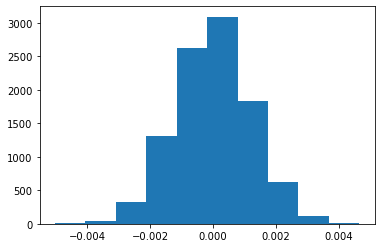

In [48]:
plt.hist(p_diffs)
plt.show()

In [49]:
new_diff = df2.query('group == "treatment" & converted == 1').shape[0] / n_new 
old_diff = df2.query('group == "control" & converted == 1').shape[0] / n_old
print(new_diff - old_diff)

-0.0015790565976871451


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [53]:
diff = (np.array(p_diffs) > (new_diff - old_diff)).mean()
print("{0} of the p_diffs are greater than the actual difference observed in ab_data.csv".format(diff))

0.9089 of the p_diffs are greater than the actual difference observed in ab_data.csv


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Our p-value is .9055 which is greater than the Type I error rate of 5% so we cannot reject the null hypothesis. This means our results are statistically significant. This study finds that the treatment page has lower conversion rates than the control page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [54]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted == 1').shape[0]
convert_new = df2.query('group == "treatment" & converted == 1').shape[0]
n_old = df2.shape[0] - df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [190]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.2862985368041895, 0.9008305535209438)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p value found with the statsmodels api looks very similar to the one we calculated in parts j and k. This is a strong p value which suggests that our data is statistically significant. Our z scale is less than the null mean, but not by a huge number. If it was a huge number we would assume the standard deviation is large enough that our p value might not be reliable, but in this case it is close enough that we can rely on the data to tell us we should stick with the old page results.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

This is a categorical response so we can use logistic regression.

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [55]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [57]:
df2['intercept'] = 1
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [58]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:               8.085e-06
Time:                        10:20:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**What we are looking for here is our hypotheses we mentioned before:**

H0: pnew−pold=0

H1: pnew−pold≠0

The p value here is .190 which is not zero, and statistically significant (over .05%) so we cannot reject the null hypothesis. 
In this test we were looking at how the conversion rate varies by page instead of identifying if the average conversion rates differ. This is the difference between a one sided test (the simulation and z test from part II) and regression (which is a two sided t-test).

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other factors might play into what converts an individual, so we might want to add attributes like the age, gender, or location of the people buying. However, when we add terms into the regression model we need to make sure that they are not correlated. So we could add two terms like "age" and "gender", but adding a binary "used to play neopets" with "age" would cause more problems with our data.


If we add too many additional terms there is a possibility that we could also run into multicolinearity which emerges when three or more variables that are highly correlated are included in the same model. This can happen even if none of the isolated pairs of variables are colinear. 

The good thing is we can test for both of these programmatically. To test for colinearity we can use numpy's corrcoef function and to test for multicolinearity we can import variance_inflation_factor from statsmodels.stats.outliers_influence which looks for the Varience Inflation Factor. With VIF if the result is between 5 and 10 there is likely some multicolinearity so we should drop the new variable. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [60]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [61]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop('US', axis = 1)
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0


In [62]:
logit = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:               1.521e-05
Time:                        10:21:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**Country does not appear to have a significant effect on conversion rate. The coefficients are very low, although the p value is significant.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [67]:
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_Cali'] = df_new['ab_page'] * df_new['CA']
lm3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK' , 'CA', 'ab_UK', 'ab_Cali']])
results = lm3.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:               3.483e-05
Time:                        10:23:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.506      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
ab_Cali       -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

**These differences also appear to be quite small. Californians are slightly less likely to convert while people in the UK are slightly more likely, but the margins are so small the change probably doesn't matter much.**

## Conclusion

In this experiement we compared the conversion rates of two landing pages. When we simulated from the null and calcuated the z-scores, we found that the landing page did not have a significant effect on the conversion rate in either test. We also tried a regression approach, but the results from the regression model agreed with the results in the A/B test. To ensure that our results were not a result of Simpson's Paradox, we tested the same regression model with a new factor comparing where people live to see if there were results on conversion, but the final result is that these factors also do not have a significant effect on the conversion rate. 